In [1]:
#Gas-phase calculations

import psi4


molecule = psi4.geometry(""" 0 1
C          1.07120       -0.10540       -0.05200
C          2.53700       -0.18760        0.29020
O          2.91680       -0.03960        1.44640
N          3.32440       -0.44230       -0.81910
C          4.72640       -0.59580       -0.84080
C          5.50340       -0.74460        0.31130
C          6.89500       -0.85190        0.22410
C          7.50800       -0.81200       -1.02130
C          6.75150       -0.69420       -2.17930
C          5.35940       -0.59590       -2.09000
O          8.86330       -0.87940       -1.14660
H          0.53880        0.40730        0.75490
H          0.66830       -1.11510       -0.16370
H          0.91790        0.46160       -0.97430
H          2.86390       -0.43250       -1.72060
H          5.05300       -0.79140        1.29780
H          7.47110       -0.96110        1.13740
H          7.24330       -0.66630       -3.14700
H          4.78850       -0.49470       -3.00840
H          9.25330       -0.89130       -0.25660



""", name= "Small Molecule")

psi4.set_options({
 "save_jk" : True,
})

e, wfn = psi4.energy("B3LYP/aug-cc-pVDZ", return_wfn=True, molecule=molecule, max_iter=5)


Scratch directory: /tmp/

*** tstart() called on Bedabratas-MacBook-Air.local
*** at Sat Dec 17 20:41:31 2022

   => Loading Basis Set <=

    Name: AUG-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 5-10 entry C          line   182 file /opt/miniconda3/share/psi4/basis/aug-cc-pvdz.gbs 
    atoms 3, 11     entry O          line   254 file /opt/miniconda3/share/psi4/basis/aug-cc-pvdz.gbs 
    atoms 4         entry N          line   218 file /opt/miniconda3/share/psi4/basis/aug-cc-pvdz.gbs 
    atoms 12-20     entry H          line    40 file /opt/miniconda3/share/psi4/basis/aug-cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RKS Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Ge

   @DF-RKS iter  10:  -515.55535132135867   -9.05408e-08   2.55465e-07 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

   Electrons on quadrature grid:
      Ntotal   =   79.9999100071 ; deviation = -8.999e-05 

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A    -19.184036     2A    -19.124508     3A    -14.380794  
       4A    -10.299002     5A    -10.250644     6A    -10.236238  
       7A    -10.202113     8A    -10.196515     9A    -10.194848  
      10A    -10.194065    11A    -10.192510    12A     -1.072434  
      13A     -1.048056    14A     -0.953471    15A     -0.857968  
      16A     -0.771607    17A     -0.761883    18A     -0.727706  
      19A     -0.644730    20A     -0.636118    21A     -0.582469  
      22A     -0.554647    23A     -0.550035    24A     -0.491838  
      25A     -0.472864    26A     -0.464827    27A     -0.453770  
      28A     -0.432450

	user time   =     212.11 seconds =       3.54 minutes
	system time =      10.25 seconds =       0.17 minutes
	total time  =        228 seconds =       3.80 minutes
Total time:
	user time   =     212.11 seconds =       3.54 minutes
	system time =      10.25 seconds =       0.17 minutes
	total time  =        228 seconds =       3.80 minutes


In [2]:
HOMO = wfn.epsilon_a_subset('AO', 'ALL').np[wfn.nalpha()-1]
LUMO = wfn.epsilon_a_subset('AO', 'ALL').np[wfn.nalpha()]
print(HOMO, LUMO, e)

-0.21559538033023998 -0.02675280409831473 -515.5553513213587


In [3]:
band_gap=(LUMO-HOMO)*27.2114 

print(band_gap)

5.138670878877411


In [4]:
#Dipole Moment Calculation

psi4.oeprop(wfn, 'DIPOLE', title='H3O+ SCF')



Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the H3O+ SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          5.6336211           -5.9673201           -0.3336990
 Dipole Y            :         -0.4343754            0.2911823           -0.1431931
 Dipole Z            :          0.5597244           -1.3870390           -0.8273146
 Magnitude           :                                                    0.9034980

 ------------------------------------------------------------------------------------


In [11]:
dipole_moment_magnitude=0.9034980*2.5417464519   #Converting to Debye

In [12]:
dipole_moment_magnitude

2.296462835798746

In [20]:
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
from psi4.driver.p4util import spectrum
import numpy as np

In [21]:
molecule = psi4.geometry(""" 0 1
C          1.07120       -0.10540       -0.05200
C          2.53700       -0.18760        0.29020
O          2.91680       -0.03960        1.44640
N          3.32440       -0.44230       -0.81910
C          4.72640       -0.59580       -0.84080
C          5.50340       -0.74460        0.31130
C          6.89500       -0.85190        0.22410
C          7.50800       -0.81200       -1.02130
C          6.75150       -0.69420       -2.17930
C          5.35940       -0.59590       -2.09000
O          8.86330       -0.87940       -1.14660
H          0.53880        0.40730        0.75490
H          0.66830       -1.11510       -0.16370
H          0.91790        0.46160       -0.97430
H          2.86390       -0.43250       -1.72060
H          5.05300       -0.79140        1.29780
H          7.47110       -0.96110        1.13740
H          7.24330       -0.66630       -3.14700
H          4.78850       -0.49470       -3.00840
H          9.25330       -0.89130       -0.25660



""", name= "Small Molecule")

psi4.set_options({
 "save_jk" : True,
})

e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=molecule)
res = tdscf_excitations(wfn, states=8, triplets="also")

# get poles and residues to plot OPA and ECD spectra
poles = [r["EXCITATION ENERGY"] for r in res]
opa_residues = [np.linalg.norm(r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"])**2 for r in res]
ecd_residues = [r["ROTATORY STRENGTH (LEN)"] for r in res]

opa_spectrum = spectrum(poles=poles, residues=opa_residues, gamma=0.01, out_units="nm")
ecd_spectrum = spectrum(poles=poles, residues=ecd_residues, kind="ECD", gamma=0.01, out_units="nm")


Scratch directory: /tmp/

*** tstart() called on Bedabratas-MacBook-Air.local
*** at Sat Dec 17 21:12:38 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 5-10 entry C          line   138 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 3, 11     entry O          line   198 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 4         entry N          line   168 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 12-20     entry H          line    22 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Mole

    One-Electron Energy =               -1832.2185342473794663
    Two-Electron Energy =                 748.0563165976050186
    Total Energy =                       -512.4141510221743374

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          5.4174409           -5.9673201           -0.5498793
 Dipole Y            :         -0.4301317            0.2911823           -0.1389494
 Dipole Z            :          0.5653536           -1.3870390           -0.8216854
 Magnitude           :                                              

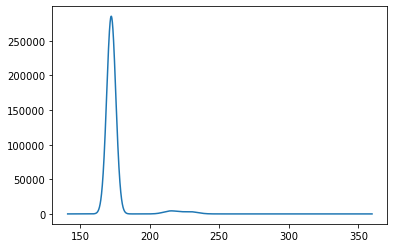

In [31]:
#One photon absorption spectrum


import matplotlib.pyplot as plt

plt.plot(opa_spectrum['convolution']['x'], opa_spectrum['convolution']['y'] )

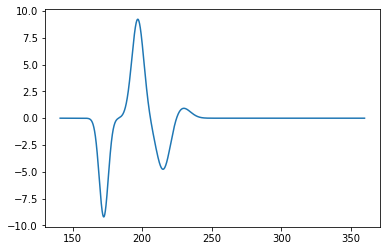

In [33]:
#electronic circular dichroism (ECD) spectrum

plt.plot(ecd_spectrum['convolution']['x'], ecd_spectrum['convolution']['y'] )